In [56]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier  #분류
# from sklearn.neighbors import KNeighborsRegressor  #예측
from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn.preprocessing import PolynomialFeatures  #다항특성을 만들어주는 라이브러리

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= '10'  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

선형회귀

In [57]:
df=pd.read_csv('https://bit.ly/perch_csv')
perch_full=df.to_numpy()

In [58]:
df.info()   #null,0,타입 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [59]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [60]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [61]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [62]:
train_input,test_input,train_target,test_target= train_test_split(
    perch_full,perch_weight,random_state=42
)
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [63]:
#데이터 훈련 특성 **2
lr= LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [64]:
lr.score(train_input,train_target)

0.9559326821885706

In [65]:
lr.score(test_input,test_target)

0.8796419177546367

In [66]:
train_input.shape   
#(42,3) 

(42, 3)

In [67]:
#특성을 추가해서 모델적용 - Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures
#degree=2
poly =PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])


array([[2., 3., 4., 6., 9.]])

In [68]:
#특성을 추가해서 모델적용 - Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)


In [69]:
train_poly.shape

(42, 55)

In [70]:
#데이터 훈련 특성 **2
lr= LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [71]:
df.columns

Index(['length', ' height', ' width'], dtype='object')

In [72]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [73]:
#특성을 추가해서 모델적용 - Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)

In [74]:
train_poly.shape

(42, 19)

규제 -릿지규제(회귀),라쏘규제(회귀) 
선형회귀에서 특성의 값을 많이 늘어났을때, 특성의 값을 규제, test세트에서도 제대로 예측할수 있도록 함.
(데이터-평균)/표준편차

In [75]:
from sklearn.preprocessing import StandardScaler #표준화 작업 클라스

#표준화작업
ss=StandardScaler()
ss.fit(train_poly)  #표준화 적용
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [79]:
#릿지규제(회귀)
from sklearn.linear_model import Ridge 
ridge=Ridge()
ridge.fit(train_scaled,train_target)

Ridge()

In [77]:
ridge.score(train_scaled,train_target)

0.989249651228496

In [81]:
ridge.score(test_scaled,test_target)

0.9828006912621816

In [87]:
#릿지회귀에서도 강도를 어느정도 할지에 따라 예측률이 높아지는 형태가 나옴.
#Ridge(alpha=1) ->늘여봄.
#for문을 사용해서 alpha값을 조정
#그래프 적용을 위해 배열
train_score = []
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)   #0.001,0.01,0.1,1,10,100
    ridge.fit(train_scaled,train_target)
    train1=ridge.score(train_scaled,train_target)
    test1=ridge.score(test_scaled,test_target)
    train_score.append(train1)   #리스트에 추가
    test_score.append(test1)   #리스트에 추가

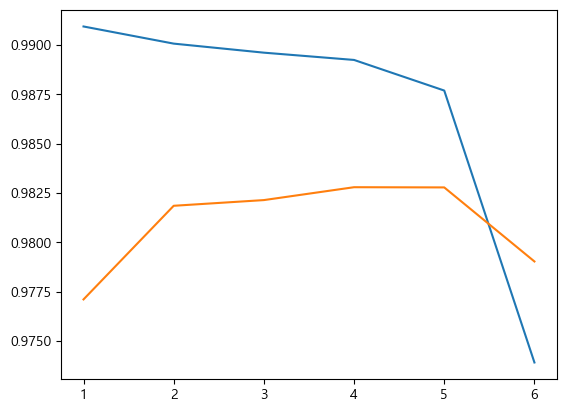

In [93]:
# x축 눈금적용
# g1=[1,2,3,4,5,6]
g1=np.arange(1,7).reshape(-1,1)
#g1 =np.log10(alpha_list)
plt.plot(g1,train_score)
plt.plot(g1,test_score)

In [91]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896184558436645
0.9821480083389695
